# Task 1: 
The LinearRegression() function in the sklearn module constructs a linear prediction model by selecting a set of coefficients and a bias.


to lower the residual sum of squares between the actual targets in the training dataset and the targets predicted using a linear approximation of the features


LinearRegression() takes a few inputs to help select the features of the linear model.

A type of linear regression is linear regression ().

fit() is a function that takes as an input a training dataset and generates a model to fit that dataset.

By minimising the Mean Squared Error between the training and projected data, the fit() algorithm sets the coefficients to their most ideal values. 

In [1]:
import random
import numpy as np
import pandas as pd
from math import sqrt
from pickle import load
import matplotlib.pyplot as plt
import sklearn.preprocessing as pp #
import sklearn.linear_model as lm #

# Task 2: Calculating Bias and Variance
### and Task 4: Plotting Bias^2 and Variance Graph :


At degree = 2, the bias is particularly high, meaning that models with lower degrees significantly underfitting the data.

At degree 3, the bias quickly declines to a much smaller percentage, and then stays nearly constant for the higher degrees.

The variance rises steadily until degree = 8, then stays almost constant until reaching its maximum at extremely high degrees, indicating overfitting. 

In [2]:
# first, we will load train data set into a variable array.
datafile = open('./data/train.pkl', 'rb') # opens the train.pkl file.
train_data = load(datafile) # loads contents of the file into a variable array.
# train_data # prints the data in jupyter.

In [3]:
random.shuffle(train_data) # this function shuffles the elements of the array randomly.
# the train_data is changed itself so, no need to store it in a new variable.
# train_data # prints the data in jupyter.

In [4]:
# The array_split() function returns the list of n arrays,
# each containing approximately the same number of elements from the list.
split_data = np.array_split(train_data, 16) # split_data is an array of sixteen arrays.
# data_split[0] # this gives the first array of the divided training data set.

x_co_ordinates_of_training_data_set = []
y_co_ordinates_of_training_data_set = []

# print(split_data[0][:, 0]) checking to see
# print(split_data[0][:, 1])

split_data[0][:, 1]

for i in range(0,16,1):
    x_co_ordinates_of_training_data_set.append(split_data[i][:, 0])
    x_co_ordinates_of_training_data_set[i] = [[temp] for temp in x_co_ordinates_of_training_data_set[i]]
    y_co_ordinates_of_training_data_set.append(split_data[i][:, 1])

In [5]:
#loading test data
datafile = open('./data/test.pkl', 'rb')
test_data = load(datafile)
    
test_data = np.sort(test_data, axis = 0)
test_x = test_data[:, 0]
test_x = [[temp] for temp in test_x]
test_y = test_data[:, 1]

In [6]:
#prepocessing
train_x_bar = []
test_x_bar = []
for i in range (1, 16,1):
    train_x_bar.append([])
    for j in range (0,15,1):
        train_x_bar[i - 1].append(pp.PolynomialFeatures(i).fit_transform(x_co_ordinates_of_training_data_set[j]))

for i in range (1, 16,1):
    test_x_bar.append(pp.PolynomialFeatures(i).fit_transform(test_x))

In [7]:
#using LinearRegression to build best model
models = []
        
for i in range (1, 16,1):
    models.append([])
    for j in range (0,15,1):
        models[i-1].append(lm.LinearRegression().fit(train_x_bar[i - 1][j], y_co_ordinates_of_training_data_set[j]))

In [8]:
#Predictions
y_pred = []
y_total = []
average_y_pred = []
for i in range (1, 16,1):
    y_total.append(0)
    y_pred.append([])
    for j in range (0,15,1):
        y_pred[i - 1].append(models[i - 1][j].predict(test_x_bar[i - 1]))
        y_total[i - 1] += y_pred[i - 1][j]
        
    average_y_pred.append(y_total[i - 1] / 16)
    

y_pred = np.array(y_pred)

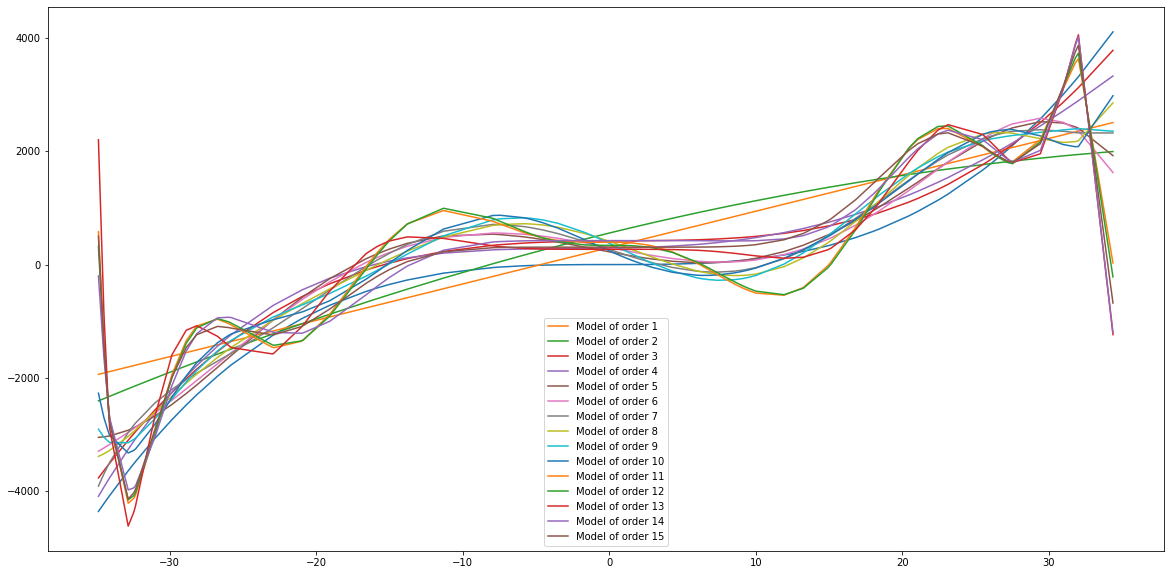

In [9]:
#plotting models for all orders
plt.figure(figsize=(20,10))
plt.plot(np.array_split(test_data, 2, axis = 1)[0], np.array_split(test_data, 2, axis = 1)[1])
for order in range(1, 16,1):
    for train_set in range(1):
        plt.plot(np.split(test_data, 2, axis = 1)[0],y_pred[order - 1][train_set], label='Model of order '+str(order))
plt.legend()

In [10]:
#calculating bias,variance,irreducible error
f_cap_x = np.array(average_y_pred)

f_x = np.array(test_y)

xaxis = []
bias_array = []
bias_2_array = []
variance_array = []
temp = []
mean_squared_error_array = []
irreduceable_error_array = []
for i in range (1, 16,1):
    xaxis.append(i)
    bias_2 = np.mean((f_cap_x[i - 1] - f_x)*(f_cap_x[i - 1] - f_x))
    bias_2_array.append(np.mean((f_cap_x[i - 1] - f_x)**2))
    bias = np.mean(np.abs(f_cap_x[i - 1] - f_x))
    bias_array.append(bias)
    

    variance = np.mean((y_pred[i-1] - f_cap_x[i-1].T)*(y_pred[i-1] - f_cap_x[i-1].T) )
    variance_array.append(variance)
    mean_squared_error = np.mean((y_pred[i-1] - f_x) * (y_pred[i-1] - f_x) )
    mean_squared_error_array.append(mean_squared_error)

irreduceable_error = np.array(mean_squared_error_array) - np.array(bias_2_array)**2 - np.array(variance_array)
irreduceable_error
#irreduceable_error_array.append(irreduceable_error_array)

array([-2.71880311e+11, -2.41188829e+11, -3.13374914e+07, -2.82808406e+07,
       -4.63825999e+07, -2.12293128e+08, -2.42347862e+08, -4.18743909e+08,
       -4.14029618e+08, -3.29410081e+08, -8.46362562e+08, -1.53052100e+09,
       -1.54969100e+09, -5.07214223e+09, -1.71857755e+09])

In [11]:
for i in range(15):
    print("bias= ", bias_array[i] ,", variance= ", variance_array[i])

bias=  583.979449819073 , variance=  50991.3418435721
bias=  575.8857227922954 , variance=  78840.30465462558
bias=  63.49458552571374 , variance=  101636.7626641455
bias=  65.5115545641273 , variance=  122190.92158913965
bias=  65.23006541683921 , variance=  143350.79444349825
bias=  95.07717220952341 , variance=  162670.8473290507
bias=  94.42636808657986 , variance=  203664.23930392222
bias=  99.55018650228865 , variance=  212644.01224153768
bias=  98.3019835211298 , variance=  222251.38369838457
bias=  93.83581248876837 , variance=  238743.14283039272
bias=  103.8928534146393 , variance=  296418.06306219153
bias=  115.45537023210595 , variance=  324840.2785887003
bias=  112.3258423843159 , variance=  362004.2942572676
bias=  144.1632314709239 , variance=  339564.97245012753
bias=  107.52560350152346 , variance=  390321.26926203823


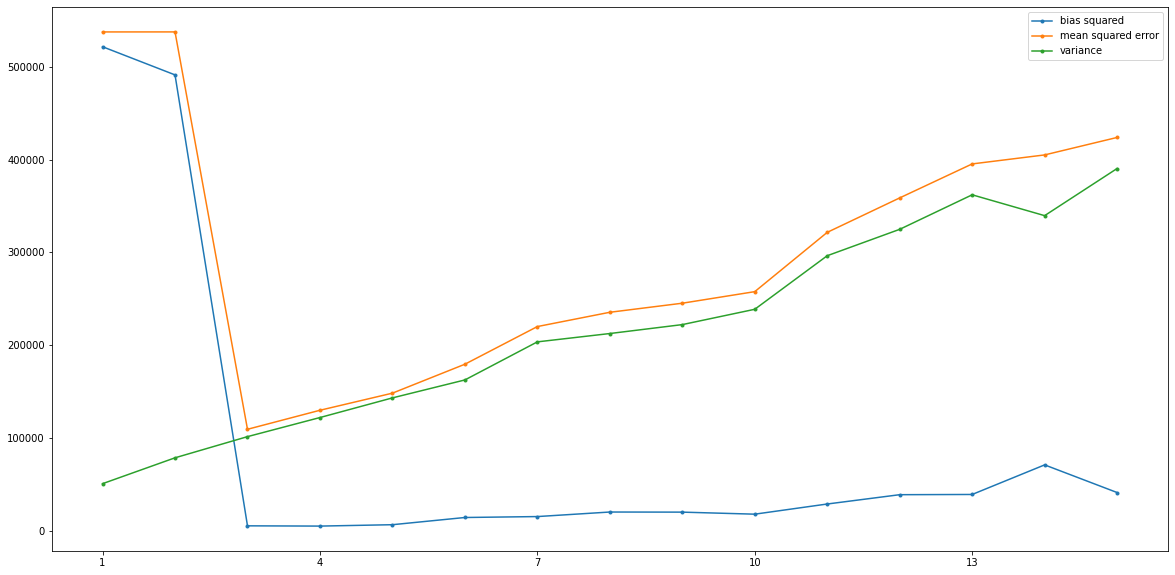

In [12]:
#plotting bias^2 - variance v/s graph
plt.figure(figsize=(20,10))
plt.plot(xaxis, bias_2_array, label = "bias squared", marker='.') # Graph of bias squared
plt.plot(xaxis, mean_squared_error_array, label = "mean squared error", marker='.') # Graph of mean squared error
plt.plot(xaxis, variance_array, label = "variance",marker='.') # Graph of variance
plt.xticks(np.arange(1, 16, step=3))
plt.legend()

# Task 2.3:

The graph and table of irreducible errors are provided below.
The irreducible error is extremely small, on the order of 10-11.
These low numbers suggest that the data was collected without a lot of noise. 

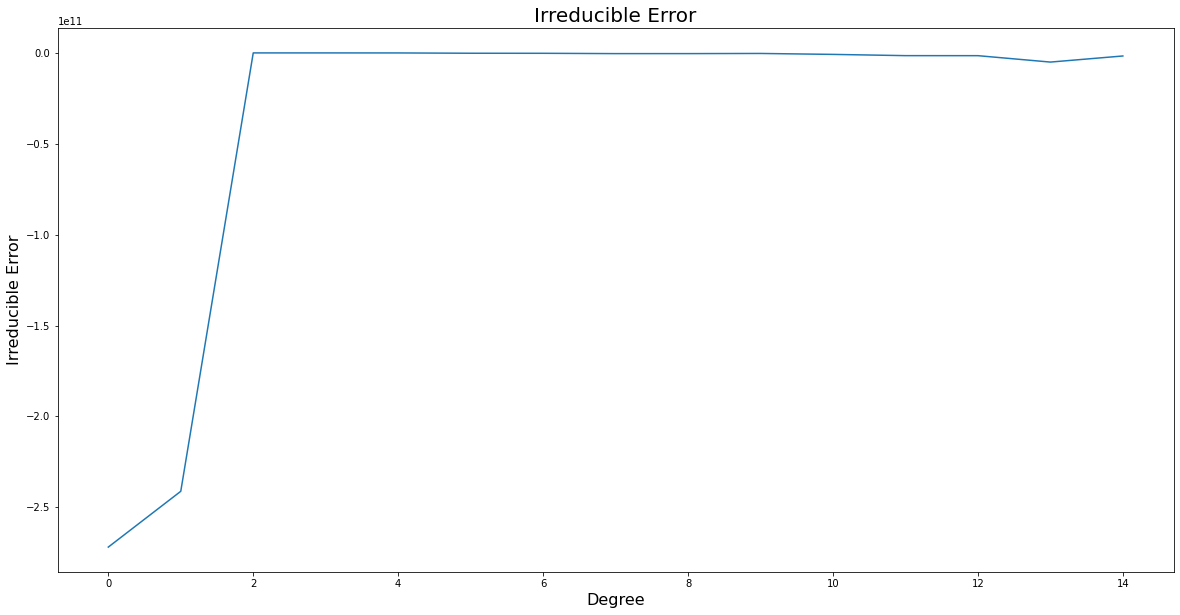

In [13]:
# plot the Irreducible Error
plt.figure(figsize=(20,10))
plt.plot(irreduceable_error)
# plt.plot(np.mean(irreducible_error), 'r')
plt.xlabel('Degree', fontsize=16)
plt.ylabel('Irreducible Error', fontsize=16)
plt.title('Irreducible Error', fontsize=20)
plt.show()